In [1]:
import os
import pickle
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import normalize
import random

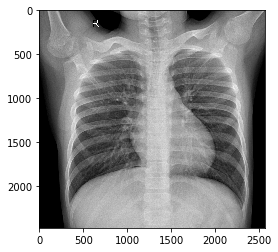

Normal X-ray


In [2]:
TRAIN_DIR = 'ZhangLabData/CellData/chest_xray/train'
TEST_DIR = 'ZhangLabData/CellData/chest_xray/test'
categories = ['NORMAL', 'PNEUMONIA']

#shows how a normal x-ray looks like
category = 'NORMAL'
path = os.path.join(TRAIN_DIR, category)
for img in os.listdir(path):
    img_data = cv2.imread(os.path.join(path, img))
    plt.imshow(img_data, cmap = 'gray')
    plt.show()
    break
print('Normal X-ray')

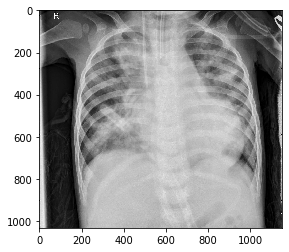

Pneumonia X-ray


In [3]:
#shows two  types of X-rays having bacteria-pneumonia / virus-pneumonia
category = 'PNEUMONIA'
path = os.path.join(TRAIN_DIR, category)
for img in os.listdir(path):
    img_data = cv2.imread(os.path.join(path, img))
    plt.imshow(img_data, cmap = 'gray')
    plt.show()
    break
print('Pneumonia X-ray')

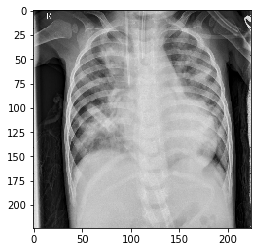

(224, 224, 3)


In [4]:
#change the size of the X-ray image for better processing
IMG_SIZE = 224

def resize_img(img_data):
    new_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE))
    return new_data

new_data = resize_img(img_data)
plt.imshow(new_data, cmap = 'gray')
plt.show()
print(new_data.shape)

In [5]:
#lets create training data
train_data = []

#used to assign label to the given train
def assign_label(img):
    label = -1
    type_x = img.split('-')[0]
    
    if type_x == 'NORMAL':
        label = 0
    elif type_x == 'BACTERIA':
        label = 1
    else:
        label = 2
    
    return label

def load_train_data():
    for category in categories:
        path = os.path.join(TRAIN_DIR, category)
        for img in os.listdir(path):
            label = assign_label(img)
            try:
                img_data = cv2.imread(os.path.join(path, img))
                new_data = resize_img(img_data)
                train_data.append([new_data, label])
            except Exception as e:
                print(e)

load_train_data()
random.shuffle(train_data)

In [6]:
test_data = []

def load_test_data():
    for category in categories:
        path = os.path.join(TEST_DIR, category)
        for img in os.listdir(path):
            label = assign_label(img)
            try:
                img_data = cv2.imread(os.path.join(path, img))
                new_data = resize_img(img_data)
                test_data.append([new_data, label])
            except Exception as e:
                print(e)

load_test_data()
random.shuffle(test_data)

In [7]:
X_train,X_test = [],[]
y_train, y_test = [],[]

def convert2np(data_arr):
    X,y = [],[]
    for data, label in data_arr:
        X.append(data)
        y.append(label)
    
    X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 3)
    y = np.array(y)
    
    X = X = normalize(X, axis = 1)
        
    return X,y

X_train, y_train = convert2np(train_data)
X_test, y_test = convert2np(test_data)

In [8]:
X_train[0].shape

(224, 224, 3)